In [8]:
# General
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets

In [2]:
dataset_names = ['new', 'top', 'hot']
dfs = {}

for name in dataset_names:
    dfs[name] = pd.read_csv(f'data/MHPH_{name}.csv')
    print(dfs[name].shape)

(986, 11)
(998, 11)
(998, 11)


In [4]:
# overall dataset
df = pd.read_csv('data/MHPH.csv')
print(df.shape)
df.head()

(1937, 10)


,title,num_comments,text,id,author,created_utc,score,upvote_ratio,url,flair
0,Ano po ba iniinum nyong gamot sa anhedonia?,2,May anhedonia po ako 5 years na pa help po,13wevrj,PleasantGuest4207,1.685516e+09,1,1.00,https://www.reddit.com/r/MentalHealthPH/commen...,DISCUSSION
1,What do you do when you feel that your meds ar...,1,Basically the title :( I've been on a dose of ...,13wca6d,sagehuntress,1.685508e+09,4,1.00,https://www.reddit.com/r/MentalHealthPH/commen...,DISCUSSION
2,Where to buy ADHD meds?,2,"Tried calling southstar, mercury, watson's tap...",13wb7pz,Electrical_Lemon640,1.685504e+09,1,1.00,https://www.reddit.com/r/MentalHealthPH/commen...,INFORMATION
3,How to overcome victim mentality? any book rec...,30,Just realized yesterday that I have victim min...,13waqsr,UneducatedGrey,1.685503e+09,3,1.00,https://www.reddit.com/r/MentalHealthPH/commen...,INFORMATION
4,I'm always not okay,5,Sometimes I'm okay but most of the time I'm no...,13w9wjp,lostanddehydrated,1.685501e+09,3,0.81,https://www.reddit.com/r/MentalHealthPH/commen...,TRIGGER WARNING


# Definitions

Hot – Prioritizes posts that have recently been getting interaction (upvotes, comments etc)
Use this if you’re looking for trending topics
Top - Prioritizes posts that have all-time high upvote numbers and comments (can be filtered by time too)
Use this if you’re looking for famous posts (eg. Obama’s Ask Me Anything on Reddit)
New - Prioritizes the newest posts, regardless of interactions
Use this if you’re trying to see the most up to date information

Upvote ratio - percentage of upvotes from all votes
Score - number of upvotes

# Engagement by Post Type

In [6]:
print(df['num_comments'].mean(),
    df['score'].mean(),
    df['upvote_ratio'].mean())

7.886938564790913 23.159008776458442 0.9167888487351575


In [9]:
# For each dataset, get the mean of the number of comments, score and upvote ratio

summary_data = []

for name in dataset_names:
    mean_comments = dfs[name]['num_comments'].mean()
    mean_score = dfs[name]['score'].mean()
    mean_upvote = dfs[name]['upvote_ratio'].mean()

    summary_data.append({'tag': name, 'ave_comments': mean_comments,
                         'ave_score': mean_score, 'ave_upvote': mean_upvote})

summary_df = pd.DataFrame(summary_data)

summary_df

,tag,ave_comments,ave_score,ave_upvote
0,new,4.442191,5.545639,0.874178
1,top,11.666333,41.965932,0.961954
2,hot,4.830661,5.905812,0.874910


In [45]:
summary_df.to_csv('data/engagement_by_posttag.csv', index=False)

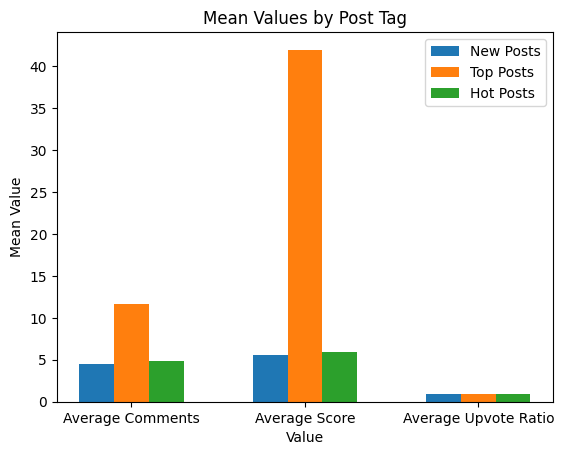

In [32]:
# Bar chart for summary_df - CANNOT USE THIS SINCE DIFFERENT UNITS

# Define the x-axis values (categories)
categories = ['Average Comments', 'Average Score', 'Average Upvote Ratio']

# Define the y-axis values
new_data = summary_df.loc[0][1:]
top_data = summary_df.loc[1][1:]
hot_data = summary_df.loc[2][1:]

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
bar_positions = range(len(categories))

# Create the bar chart
plt.bar(bar_positions, new_data, width=bar_width, label='New Posts')
plt.bar([pos + bar_width for pos in bar_positions], top_data, width=bar_width, label='Top Posts')
plt.bar([pos + 2*bar_width for pos in bar_positions], hot_data, width=bar_width, label='Hot Posts')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Mean Value')
plt.title('Mean Values by Post Tag')
plt.xticks([pos + bar_width for pos in bar_positions], categories)

# Add legend
plt.legend()

# Show the plot
plt.show()


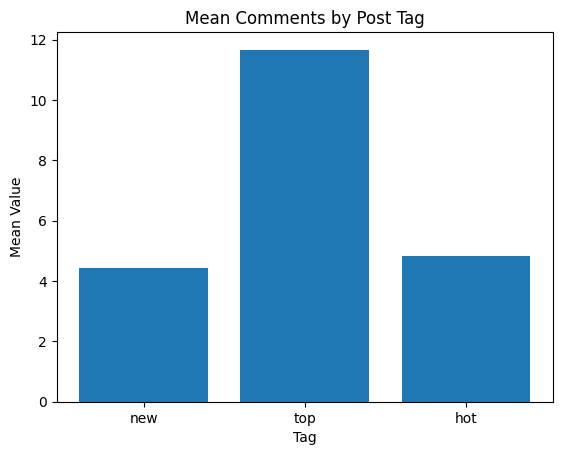

In [10]:
# Bar chart for comments

plt.bar(summary_df['tag'], summary_df['ave_comments'])
plt.xlabel('Tag')
plt.ylabel('Mean Value')
plt.title('Mean Comments by Post Tag')

plt.show()

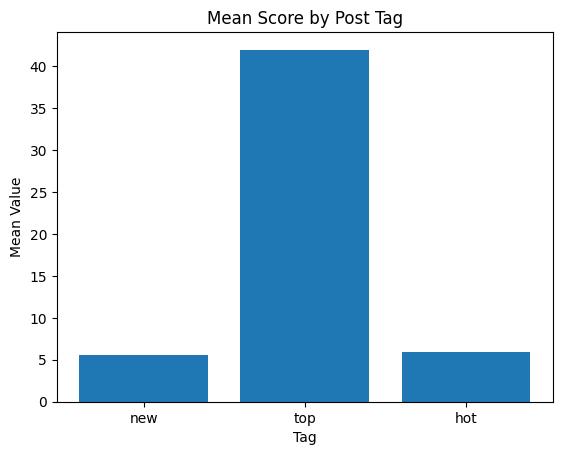

In [11]:
# Bar chart for score

plt.bar(summary_df['tag'], summary_df['ave_score'])
plt.xlabel('Tag')
plt.ylabel('Mean Value')
plt.title('Mean Score by Post Tag')

plt.show()

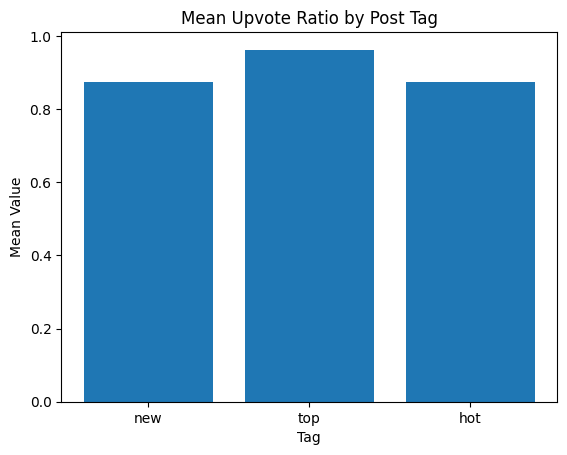

In [12]:
# Bar chart for upvote

plt.bar(summary_df['tag'], summary_df['ave_upvote'])
plt.xlabel('Tag')
plt.ylabel('Mean Value')
plt.title('Mean Upvote Ratio by Post Tag')

plt.show()

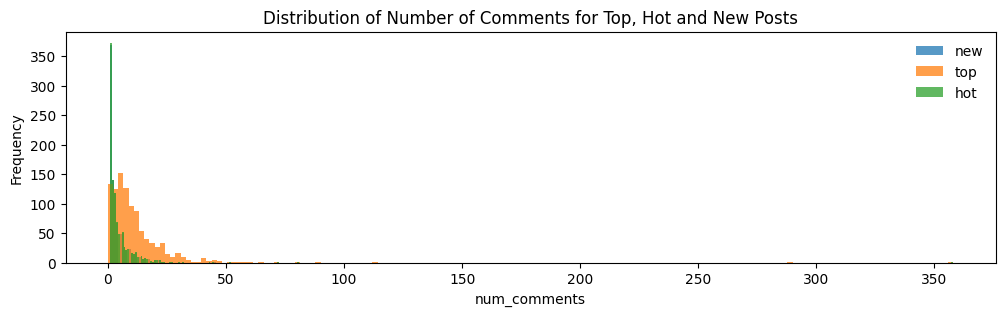

<Figure size 1200x300 with 0 Axes>

In [34]:
# Histograms for usage

col = 'num_comments'

fig,ax = plt.subplots(figsize=(12, 3))

for name in dataset_names:
    sns.histplot(dfs[name][col], ax=ax, label=name, edgecolor='None')

plt.title('Distribution of Number of Comments for Top, Hot and New Posts')
plt.ylabel('Frequency')
plt.legend(frameon=False)
plt.figure(figsize=(12, 3))
plt.show()

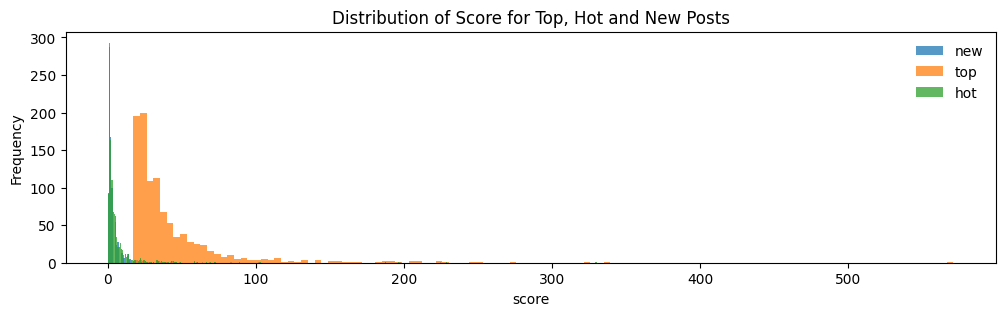

In [35]:
# Histograms for usage

col = 'score'

fig,ax = plt.subplots(figsize=(12, 3))

for name in dataset_names:
    sns.histplot(dfs[name][col], ax=ax, label=name, edgecolor='None')

plt.title('Distribution of Score for Top, Hot and New Posts')
plt.ylabel('Frequency')
plt.legend(frameon=False)
plt.show()

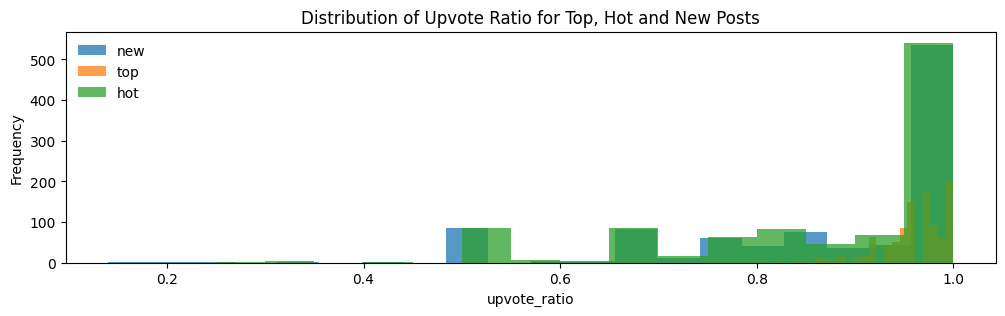

In [36]:
# Histograms for usage

col = 'upvote_ratio'

fig,ax = plt.subplots(figsize=(12, 3))

for name in dataset_names:
    sns.histplot(dfs[name][col], ax=ax, label=name, edgecolor='None')

plt.title('Distribution of Upvote Ratio for Top, Hot and New Posts')
plt.ylabel('Frequency')
plt.legend(frameon=False)
plt.show()

# Engagement by Flair

In [39]:
df['flair'] = df['flair'].str.lower()

In [43]:
column_names = ['num_comments', 'score', 'upvote_ratio']

eng_flair_data = []

for col in column_names:
    eng_flair_data.append(df.groupby('flair')[col].mean())

eng_flair_data = pd.DataFrame(eng_flair_data)

eng_flair_data

flair,discussion,event,help,info,information,inspirational,meds,meta,nsfw,promotion,question,recomm-doctor,recovering,story,survey,treatment,trigger warning,venting
num_comments,7.915789,7.333333,10.747253,27.00,6.287197,6.257576,5.00,39.833333,15.00,5.00,8.00,18.00,2.00,7.551020,4.666667,14.240,6.347656,9.75000
score,12.870175,29.000000,28.483516,27.00,18.574394,72.015152,19.00,40.833333,18.00,21.00,46.00,34.00,28.00,25.982143,23.000000,50.080,17.203125,37.21000
upvote_ratio,0.885737,0.896667,0.959780,0.97,0.911765,0.974394,0.82,0.940000,0.87,0.93,0.94,0.89,0.86,0.928878,0.886667,0.978,0.898477,0.96415


In [46]:
eng_flair_data.to_csv('data/engagement_by_flair.csv', index=False)

# Flairs by Post Type

In [48]:
dfs['new']['flair'] = dfs['new']['flair'].str.lower()
dfs['top']['flair'] = dfs['top']['flair'].str.lower()
dfs['hot']['flair'] = dfs['hot']['flair'].str.lower()

In [49]:
# For each dataset, get the distribution of flairs
flair_data = []

for name in dataset_names:
    flair_data.append(dfs[name]['flair'].value_counts())

flair_data = pd.DataFrame(flair_data)

flair_data

flair,discussion,information,story,trigger warning,meta,venting,help,inspirational,treatment,event,survey,info,meds,promotion,question,recovering,recomm-doctor,nsfw
count,420.0,202.0,201.0,155.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
count,155.0,97.0,214.0,110.0,4.0,200.0,91.0,66.0,25.0,6.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
count,424.0,203.0,205.0,157.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
flair_data['flair_new'] = dataset_names #renaming rows

In [98]:
flair_data

flair,discussion,information,story,trigger warning,meta,venting,help,inspirational,treatment,event,survey,info,meds,promotion,question,recovering,recomm-doctor,nsfw,flair_new
count,420.0,202.0,201.0,155.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,new
count,155.0,97.0,214.0,110.0,4.0,200.0,91.0,66.0,25.0,6.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,top
count,424.0,203.0,205.0,157.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hot


In [52]:
flair_data.to_csv('data/flair_by_posttag.csv', index=False)

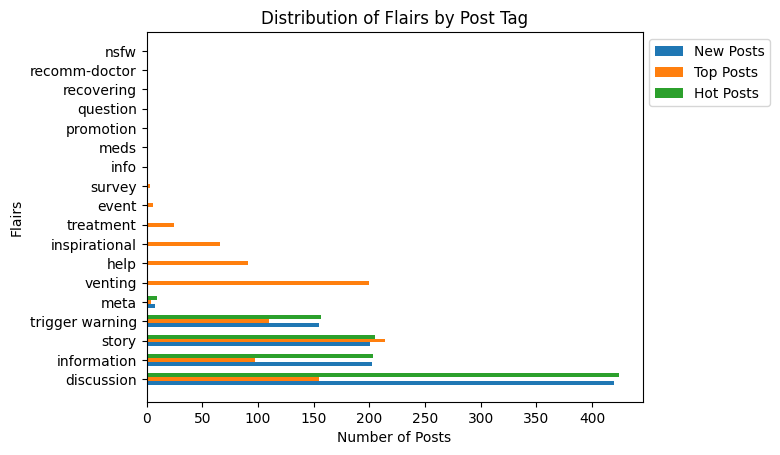

In [102]:
# Define the y-axis values (categories)
categories = flair_df.columns[0:18]

# Define the x-axis values
new_data = flair_df.iloc[0][0:18]
top_data = flair_df.iloc[1][0:18]
hot_data = flair_df.iloc[2][0:18]

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the y-axis
bar_positions = np.arange(len(categories))

# Create the horizontal bar chart for each post type
plt.barh(bar_positions - bar_width, new_data, height=bar_width, label='New Posts')
plt.barh(bar_positions, top_data, height=bar_width, label='Top Posts')
plt.barh(bar_positions + bar_width, hot_data, height=bar_width, label='Hot Posts')

# Add labels and title
plt.xlabel('Number of Posts')
plt.ylabel('Flairs')
plt.title('Distribution of Flairs by Post Tag')
plt.yticks(bar_positions, categories)

# Add legend
plt.legend()
plt.legend(bbox_to_anchor=(1, 1), loc = 'upper left')

# Show the plot
plt.show()
